In [142]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.interpolate as interp

import pandas as pd
import matplotlib as mpl

df = pd.read_csv("https://raw.githubusercontent.com/payel5997/Data-Incubator-Challenge/master/earthquake_data.csv") 

Text(0.5, 0, 'Earthquake Magnitude')

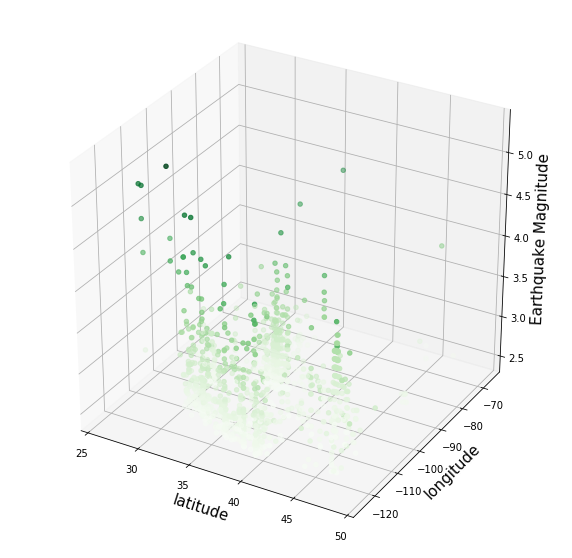

In [143]:
plt.rcParams["figure.figsize"]=10,10
ax = plt.axes(projection='3d')
X = df[df.columns[1]]
Y = df[df.columns[2]]
Z = df[df.columns[4]]
surf = ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');
# fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('latitude', fontsize=15)
ax.set_ylabel('longitude', fontsize=15)
ax.set_zlabel('Earthquake Magnitude', fontsize=15)

In [144]:
plotx,ploty, = np.meshgrid(np.linspace(np.min(X),np.max(X),30),\
                           np.linspace(np.min(Y),np.max(Y),30))

In [145]:
plotz = interp.griddata((X,Y),Z,(plotx,ploty),method='linear')

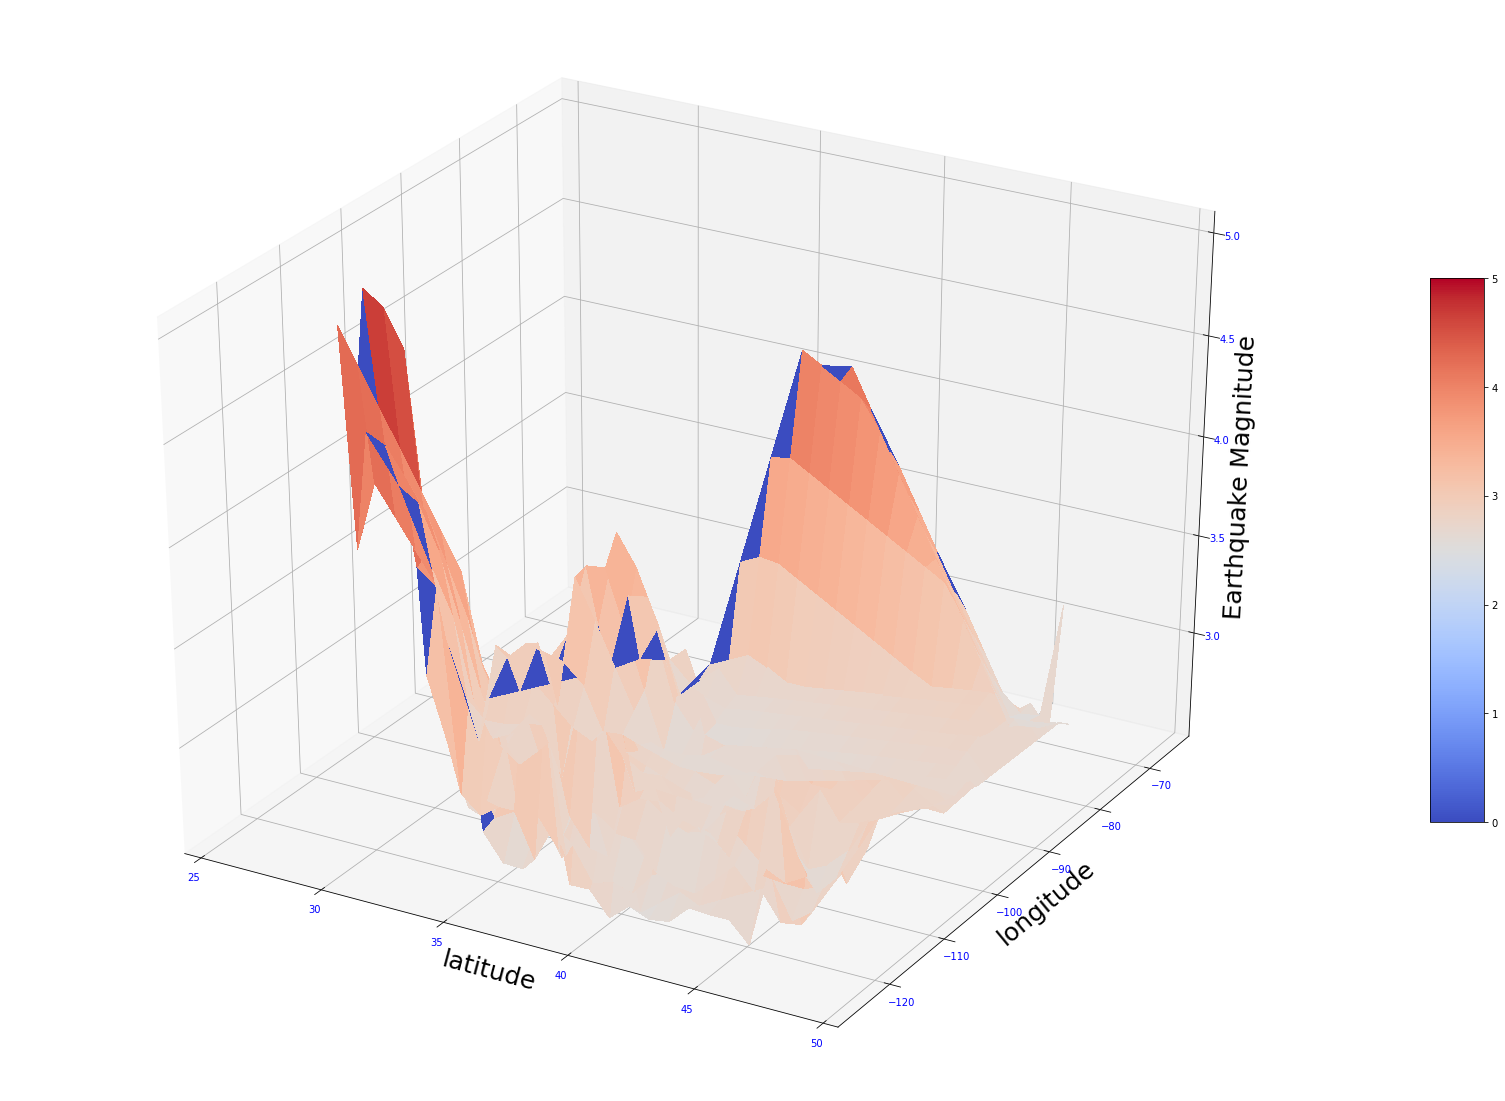

In [147]:
plt.rcParams["figure.figsize"]=30,20
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
normalize = mpl.colors.Normalize(vmin=0, vmax=5)
surf = ax.plot_surface(plotx,ploty,plotz,cstride=1,rstride=1,\
                linewidth=1, cmap='coolwarm', shade='True',\
                antialiased=False, norm = normalize)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('latitude', fontsize=25)
ax.set_ylabel('longitude', fontsize=25)
ax.set_zlabel('Earthquake Magnitude', fontsize=25)

ax.tick_params(direction='out', length=6, width=2, colors='b',
               grid_color='r', grid_alpha=0.5)
plt.show()
